<h1>Decision Tree</h1>

<p>In this tutorial we will see how to use a decision tree for classificatino using the iris dataset (yeah again...).<br>
As for the previous tutorial (the one on k-Nearest Neighbors) visualization of the results is provided and we will also check on to visualize the decision tree itself.</p>
<p>Just like in the previous notebook and like all the following notebooks we start by importing necessary packages ...</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#uncomment the following line for interactive figures
#%matplotlib nbagg 

<p>... and the iris dataset :</p>

In [2]:
# Importing the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Do you remember what the two following lines do???
X = iris.data[:,0:3:2]
y = iris.target
# if not check the previous tutorial again or try to guess

<p>Now we have loaded everything we can train a the Decision Tree classifier with the iris dataset using ```.fit()``` :</p>

In [3]:
from sklearn import tree
dtr = tree.DecisionTreeClassifier()
dtr.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

<p>You can already notice here that a Decision Tree has much more parameters than the k-Nearest Neighbors for instance.
Some of these parameters control how decision are made at a node, such as :
<ul>
<li>criterion</li>
<li>max_features</li>
<li>splitter</li>
</ul>
others are controling the construction of the tree :
<ul>
<li>max_depth</li>
<li>min_samples_leaf</li>
<li>min_samples_split</li>
<li>etc.
</ul>
You can find more information about all the Decision Tree parameters [here](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)</p>
<p>Just like with the k-Nearest Neighbors algorithm, once trained we can ask the decision tree what would be the class of any new element(s) using ``.predict()``. Generally speaking ``scikit`` uses a common structure for most of the algorithm in the library where ``.fit()`` is used for training and ``.predict`` is used for predictions.</p>

In [4]:
# predicting for a collection of new elements :
dtr.predict([[6.0,4.0],[6.5,6.0],[5.5,2.0]])

array([1, 2, 0])

<p>... is it in agreement with the k-Nearest Neighbors approach?<br>
Is it expected?</p>
<p>Once you've figured this out let's visualize the predicted class in our parameter space.</p>

In [5]:
# create the grid
xx,yy = np.meshgrid(np.linspace(0.0,10.0,201),np.linspace(0.0,10.0,201))

# ask for the prediction at each node of the grid
pred = dtr.predict(np.c_[xx.ravel(),yy.ravel()])
Z = pred.reshape(np.shape(xx))

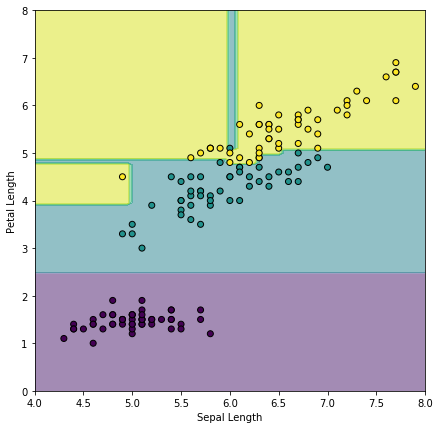

In [7]:
fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.contourf(xx, yy, Z, alpha=0.5)
ax.scatter(X.T[0], X.T[1], c=iris['target'], edgecolors='k')
ax.set_xlim(4.0,8.0)
ax.set_ylim(0.0,8.0)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length');

<p>Interesting isn't it?<br>
Actually due to the nature of the decision tree (univariate and binary) we notice that decision borders are "square" and parallel to features axes.<br>
Let's slightly different parameters...</p>

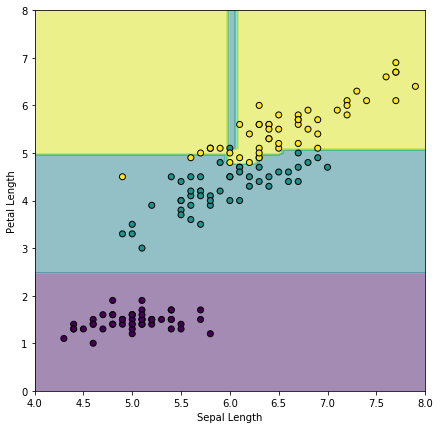

In [8]:
# ... For instance with a different min_samples_split :
dtr = tree.DecisionTreeClassifier(min_samples_split=5)
# training...
dtr.fit(X,y)

# predicting...
pred = dtr.predict(np.c_[xx.ravel(),yy.ravel()])
Z = pred.reshape(np.shape(xx))

#visualizing
fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.contourf(xx, yy, Z, alpha=0.5)
ax.scatter(X.T[0], X.T[1], c=iris['target'], edgecolors='k')
ax.set_xlim(4.0,8.0)
ax.set_ylim(0.0,8.0)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length');

<p>Something we might want to visualize as well is the decision tree itself and how decision is made at each node.
This can be done using the following lines :<br>
(requires "GraphViz" and "pydotplus" to be installed on the machine)</p>

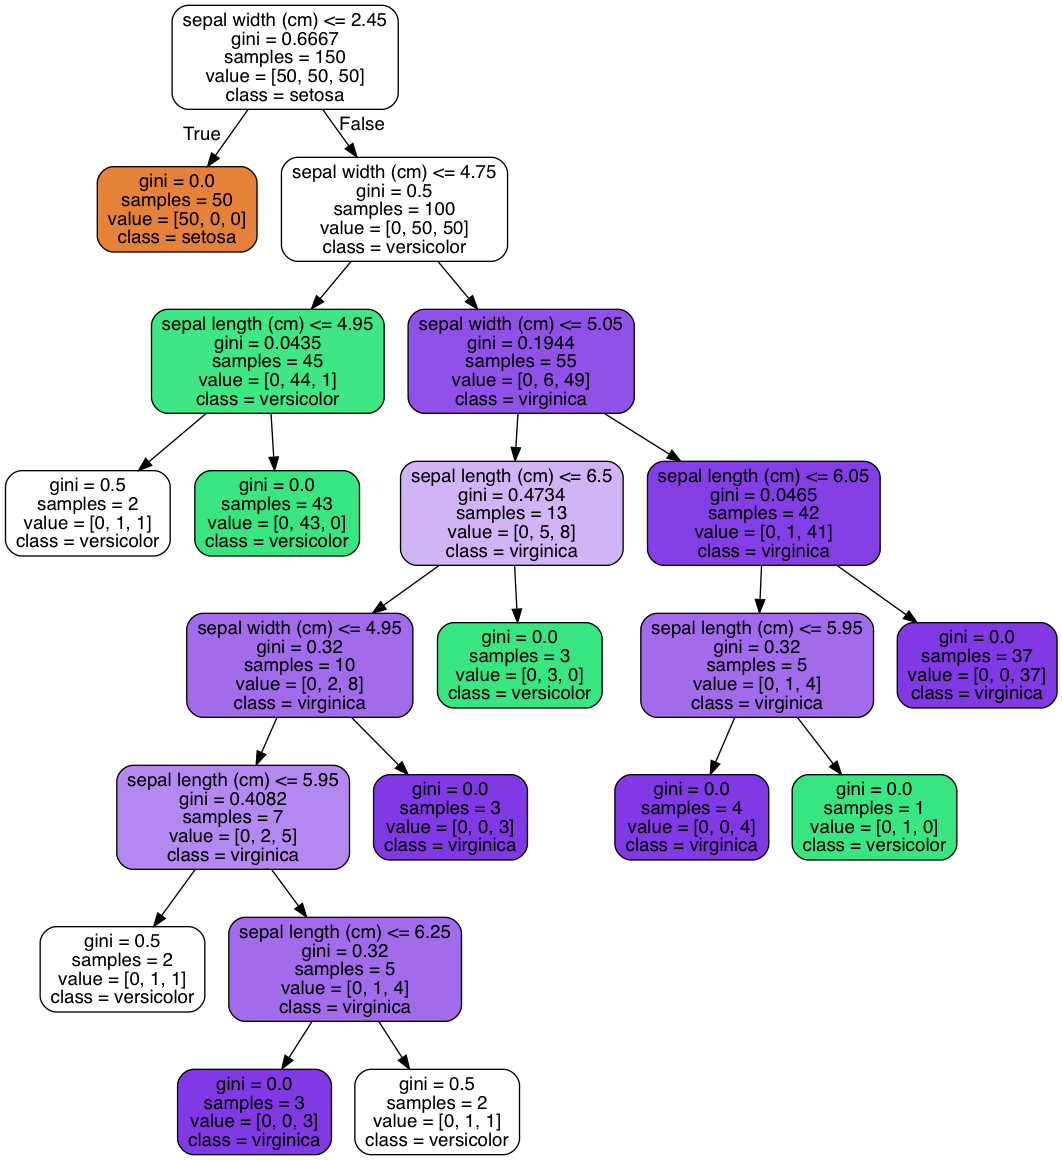

In [9]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image  

dot_data = StringIO()
f = tree.export_graphviz(dtr,out_file=dot_data,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# this line saves the figure
Image(graph.create_png())

<p>If you want it as pdf file, guess what! It's possible :</p>

In [10]:
graph.write_pdf('iris.pdf')

True

<p>Have a look at the scikit documentation :<br>
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html <br>
and try to play with the different parameters.</p>
<ul>
<li> Does it change the classification ? </li>
<li> Is it faster ? (use the command " %timeit ") </li>
<li> Any differences ? </li>
</ul>


In [11]:
#Have fun :)

